In [1]:
# Take iris flowers data set and reduce the 4D into 2D using PCA.
# Then train the model and predict a new flower with given measurements. 

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# take iris flower data from scikit learn
from sklearn import datasets
iris = datasets.load_iris()
iris.data # display the data rows

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
# display the column names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# take independent features as x
x = pd.DataFrame(iris.data, columns= iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# take target column as y
y= iris.target # 0 - setosa, 1 - versicolor, 2 - virginica
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Use StandardScaler and normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
# Display covariance matrix.
# The columns in the x_scaled wil1 become rows for calculating covariance matrix
rows = x_scaled.T # find transpose of x_scaled
covariance_matrix = np.cov(rows)
print(covariance_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [8]:
#Eigen values and eigen vectors
# eigenvectors - determine the direction and the eigenvalues determine their magnitude.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [9]:
# let us see which eigen value has highest variance
for i in range(len(eig_vals)):
    print(eig_vals[i] / sum(eig_vals))

0.7296244541329983
0.22850761786701818
0.03668921889282866
0.005178709107154747


In [10]:
# project data points on to selected eigen vector
pc1 = x_scaled.dot(eig_vecs.T[0])
pc2 = x_scaled.dot(eig_vecs.T[1])

In [12]:
# now compose the data frame for our analysis
df = pd.DataFrame (pc1, columns=['PC1'])
df['PC2'] = pc2
df['target'] = y
df

,PC1,PC2,target
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


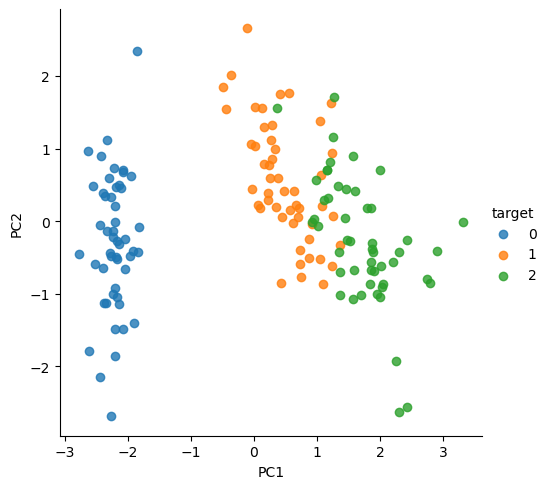

In [13]:
# draw a plot with points
sns.lmplot(x='PC1', y='PC2', data=df, fit_reg=False, hue='target')


In [20]:
# Method 2: using PCA class in sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # reduce dim to 1
projected_data = pca.fit_transform(x_scaled)

In [37]:
pc1=projected_data[:,0]
pc2=projected_data[:,1]

In [38]:
# draw the plot
df1 = pd.DataFrame(pc1, columns=['PC1'])
df1['PC2'] = pc2
df1['target'] = y

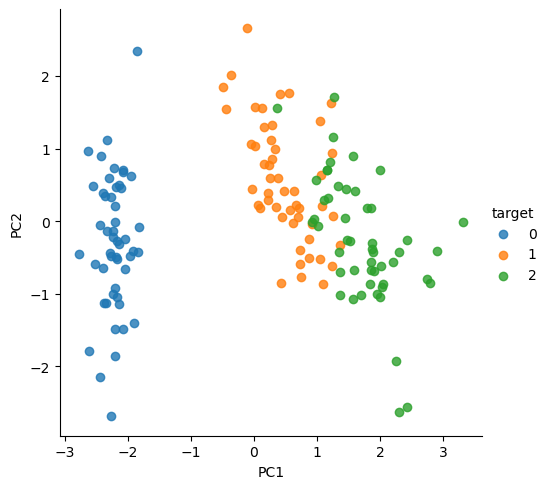

In [39]:
sns.lmplot(x='PC1', y='PC2', data=df, fit_reg=False, hue='target')

In [40]:
#remove target col and take remaining data frame
df1=df1.drop('target',axis='columns')

In [41]:
# divide the data into two parts
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df1, y, test_size=0.2)  

In [42]:
# train the model. We are using Support Vector Machine
from sklearn.svm import SVC
model = SVC() # C=1.0, kernel=' rbf , gamma='scale'
model.fit(x_train, y_train)

SVC()

In [43]:
# find accuracy level
model.score(x_test, y_test)

0.9333333333333333

In [44]:
# enter data for prediction
inputs = np.array([[6.6,3.0,4.4,1.4]])

In [45]:
# convert inputs using Standardscaler
scaled = scaler.transform(inputs)
print(scaled)

[[ 0.91683689 -0.13197948  0.36489628  0.26414192]]


C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
# apply pca and transform (do not use fit)
pca_inputs = pca.transform(scaled)

In [47]:
# make prediction
model.predict(pca_inputs) 

C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [48]:
#array([1]) -> versicolor